# College of Computing and Informatics, Drexel University
# INFO 212: Data Science Programming I
---

## Final Project Report

## Project Title: New York City: Short vs. Long Term Housing Rentals

## Student: Claudia Adam (cca57)

## Date: 6/7/25
---

# Requirements:
1. **Formatting and Structure**:
The report must follow a clear, logical structure (use headings, subheadings, markdown cells, and code cells for organization).
2. **Analysis Code and Results**:
Include all analysis code in code cells. Ensure the code is clean, readable, and uses proper commenting where necessary.
3. **Explanations**: Use markdown cells to clearly explain each step of the analysis process. Provide context for the code being executed. Interpret the results (e.g., what do the visualizations show? What insights can be drawn?).
4. **Reproducibility**:
Provide all code and commands necessary for reproducing your analysis. Ensure all data imports, transformations, and analyses run correctly in sequence.

# Marking Scheme:
- **Organization and Formatting (10 points)**: Is the notebook well-structured and visually clean?
- **Reproducibility (10 points)**: Can the entire analysis be reproduced seamlessly?
- **Code Quality (20 points)**: Is the code clear, concise, and well-documented?
- **Explanations and Insights (20 points)**: Are steps and results well-explained and insightful?
- **Data Visualization and Presentation (20 points)**: Are plots and tables effective and well-labeled?
- **Technical Content (20 points)**:
 * Is the problem well defined and described thoroughly?
 * Is the size and complexity of the data set used in this project comparable to that of the example data sets used in the lectures and assignments?
 * Did the analysis use plotting methods for visualization? Does the visualization convey meaningful messages?
 * Did the analysis use wrangling, cleaning, and preparation methods? Does the work on wrangling, cleaning, and preparation demonstrate the student's knowlegde about these topics covered in this course?
 * Did the analysis conduct aggretation and create descriptive statistics? Does the work on aggregation and descriptive statistics demonstrate the student's knowlegde about these topics covered in this course?

# YOUR REPORT GOES HERE

# 1. Introduction
---
- Introduce the project and describe the objectives.
- State the main questions or problems you aim to address with your analysis.
- Provide a summary of entire project including the data, analytics methods, and the key findings.

My project focuses on short and long term housing rental prices in New York City and how they tie into the local economy.  For short term housing, the dataset is from Airbnb and includes listings across New York City in 2019.  Since Airbnb's have become a popular alternative to hotels and New York City is a prime tourist attraction, the number and price of these short terms rentals gives a good insight into tourism housing demand.  Based on this data, I'll be exploring which neighborhoods have the highest daily prices, the distribution of room types, and the availability of airbnbs based on neighborhood.  To do this, I'll use data aggregation with either neighborhood or room type, then find the frequency or mean of the variable being explored.  I'll use a pie chart to visualize the distribution for room type, and boxplots for each neighborhood to visualize availability.

My second dataset shows listings from StreetEasy, an online real estate market for New York City, across Manhattan in 2019.  These represent long term housing aimed at residents of New York City.  This data includes rental price per month, number of bedrooms and bathrooms, square footage, and several binary variables representing different amenities of the building.  Firstly, I want to run a regression of all the numeric variables on rental price per month to gage how these variables affect average long term rental prices across Manhttan.  There's also a column for the neighborhood within Manhattan that the rental is located, I'll compute average rental price by neighborhood and then create a bar chart to visualize how rental price per month compare across neighborhoods.

From my preliminary analysis, I've found that both datasets have 20 common neighborhoods, that I can use to compare aspects of both datasets.  For the Airbnb dataset, I'm going to take a subset of the data with just listings from these overlapping neighborhoods, then I want to compute the average price and total number of listings for each neighborhood.  I'm going to merge this data with the table containing average long term rental price by neighborhood.  However, long term rental prices are measured per month so I'll divide them by 30.437 (average number of days in a month) to convert them to per day prices, like the Airbnb prices.  From here, I'll run Pearson's correlation test to see if there's an association between Airbnb average prices and long term rental prices across Manhattan neighborhoods.

The problem explored in this project is the impact of short term rentals, specifically Airbnb listings, on long term housing affordability in Manhattan, New York City. The concern is that large increases in Airbnb listings may reduce long term rental supply, and if these short term rentals are relatively highly priced, they may drive up housing prices. This issue can have an especially large impact in densely populated urban areas, such as New York City. In this project, I'm looking to explore if increases in short-term rental activity (both volume and price) are correlated with or predict higher long-term rental prices in certain neighborhoods?

# 2. Data Description
---
- Data Source: Describe the origin of your dataset. Provide a link if applicable.
- Data Loading: Present the code and methods for acquiring the data. Load the data into appropriate format for analysis.
- Dataset Analysis: Analyze the key attributes and features of your dataset (e.g., number of rows, columns, types of data).
- Data Cleaning: Clean and preprocess the data, including handling missing values or duplicates.

My first dataset is New York City Airbnb Open Data, which includes data on Airbnb listings across New York City in 2019. I found this dataset on Kaggle (https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data/data). The publisher on Kaggle accessed this dataset through Inside Airbnb (https://insideairbnb.com), a platform that uses public datasets found on the Airbnb's website to provide data and advocate for Airbnb's impact on residential communities. The data is formatted in a CSV file and includes listing level details, like neighborhood, room type, reviews, availability, etc. I was able to download a zip file directly from the Kaggle link above which contains the CSV file, this dataset can also be accessed on the Inside Airbnb website.

I also found my second dataset, StreetEasy Dataset, on Kaggle (https://www.kaggle.com/datasets/zohaib30/streeteasy-dataset). The Kaggle publisher derived this data from StreetEasy (https://streeteasy.com/), an online real estate marketplace for New York City that allow users to browse comprehensive listings for rentals and sales. They provide public data and reports on the NYC real estate market. The format of this dataset is a CSV file with information on about 5000 rental listings, including fields like rent, number of bedrooms, building amenities, etc. I downloaded the CSV file directly from the Kaggle website mentioned above.

In [39]:
# import pandas to create and manipulate dataframes
import pandas as pd
# import numpy to use math functions
import numpy as np
# import matplotlib and seaborn to create visuals
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# load the airbnb listings dataset into a dataframe
airbnb = pd.read_csv('AB_NYC_2019.csv')
# print the size, column information, and first five rows of the airbnb dataframe
print("Size of the Airbnb dataset:", airbnb.shape)
print("\n\nInformation of the Airbnb dataset:")
print(airbnb.info())
print("\n\nFirst 5 rows of the Airbnb dataset:")
print(airbnb.head())

Size of the Airbnb dataset: (48895, 16)


Information of the Airbnb dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_review

In [41]:
# cleaning the airbnb dataset

# go through each row in the dataset
for index, row in airbnb.iterrows():
    # check if the number of reviews is not zero, yet last review or reviews per month value are null
    if row['number_of_reviews'] != 0 and (pd.isnull(row['last_review']) or pd.isnull(row['reviews_per_month'])):
        # if so, drop the column from the data
        airbnb.drop(index, inplace=True)

    # check if the name for the listing is null
    if pd.isnull(row['name']):
        # create a string with the room type and neighborhood value
        # for example, 'entire house in Brooklyn'
        name = str(row['room_type']) + 'in' + row['neighbourhood']
        # set the name of that listing to the one created above
        airbnb.at[index, 'name'] = name


# create a list mapping host names to host ids
hostMap = airbnb.dropna(subset=['host_name']).drop_duplicates('host_id')[['host_id', 'host_name']]
# convert the list into a dictionary
hostMap = dict(zip(host_map['host_id'], host_map['host_name']))
# use the dictionary to map all host ids to host names
# this will fill any null host names values where the host id is present in another listing
airbnb['host_name'] = airbnb.apply(lambda row: hostMap[row['host_id']] if pd.isnull(row['host_name'])
                      and row['host_id'] in hostMap else row['host_name'], axis=1)
# drop any listings will null host name values
airbnb = airbnb.dropna(subset=['host_name'])

# print the updated column information after cleaning
print("Update information on Airbnb dataset after cleaning:")
print(airbnb.info())

Update information on Airbnb dataset after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 48874 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48874 non-null  int64  
 1   name                            48874 non-null  object 
 2   host_id                         48874 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48874 non-null  object 
 5   neighbourhood                   48874 non-null  object 
 6   latitude                        48874 non-null  float64
 7   longitude                       48874 non-null  float64
 8   room_type                       48874 non-null  object 
 9   price                           48874 non-null  int64  
 10  minimum_nights                  48874 non-null  int64  
 11  number_of_reviews               48874 non-nul

When I originally printed the column information, the columns that has null values were name, host name, last review, and reviews per month so those were the columns I needed to clean.  My preliminary analysis showed no duplicate listings in this dataset so I didn't need to drop duplicates.  Last review and reviews per month shouldn't be null if number of reviews is greater than 0, so I checked for that and dropped any rows where these columsn contradicted each other as this would be innacurate data.  For listings with null name values, I was able to create and assign a name using the number of bedrooms and borough of the listing.  Hosts can have multiple listings so I mapped all non-null host names to their ids and checked if the columns with null host names had any host ids present in other listings.  If so, I assigned the host name to the corresponding id, otherwise, I dropped the row because all listings should have a host name.  In the end, 21 rows were dropped and we can see that the updated number of listings is equal to the original number of non-null host names values, so I'm assuming all the dropped rows came from listings with null host names.

In [42]:
# load the streetEasy rental listings data into a dataframe
rentals = pd.read_csv('manhattan.csv')
# print the size, column information, and first five rows of the rental dataset
print("Size of the Airbnb dataset:", rentals.shape)
print("\n\nInformation of the Airbnb dataset:")
print(rentals.info())
print("\n\nFirst 5 rows of the Airbnb dataset:")
print(rentals.head())

Size of the Airbnb dataset: (3539, 18)


Information of the Airbnb dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym      

Fom preliminary analysis in the proposal, I knew that neither datasets had duplicate rows so I didn't need to drop duplicates fro thsi dataset.  As you can see from the column information, no rows have null values, which makes me confident that the data was already cleaned before I downloaded it.

# 3. Analysis and Findings
---

The analysis should be guided by the problem defined earlier. Show your code and explain the process and results.
- Exploratory Analysis:
 - Use visualizations and summary statistics. Use plots (e.g., histograms, scatter plots, box plots) to illustrate findings.
 - Explain the key trends and results observed in the data.
- Aggregation and Comparison:
 - Conduct group-based statistic analyses (e.g., mean, median, sum) and comparisons between different categories.
 - Create tables or plots to support your analysis.
- Insights: Provide detailed interpretations of the patterns and statistics uncovered.


**Analyzing average airbnb price by borough**

In [43]:
# create a table with the average price for each neighborhood group (ny borough)
avgAirbnbPrice = airbnb.groupby('neighbourhood_group')['price'].mean()
# sort the table by descending average rental price
avgAirbnbPrice.sort_values(ascending=False, inplace=True)
# print the result
print("Average Airbnb price per neighborhood:\n", avgAirbnbPrice)

Average Airbnb price per neighborhood:
 neighbourhood_group
Manhattan        196.895853
Brooklyn         124.398009
Staten Island    114.812332
Queens            99.536017
Bronx             87.508257
Name: price, dtype: float64


As you can see, Manhattan has the highest average nightly Airbnb price by quite a bit.  This is likely due to the high amount of tourist attractions located in Manhattan.  The average price for the Bronx and Queens is less than half the average nightly price for Manhattan, which makes sense as these areas are known for unsafe.

**Analyzing average nightly price and count of listings for each room type**

Average price per night and count for room types:
                   avg_price  count
room_type                         
Entire home/apt  211.813189  25400
Private room      89.788698  22314
Shared room       70.127586   1160


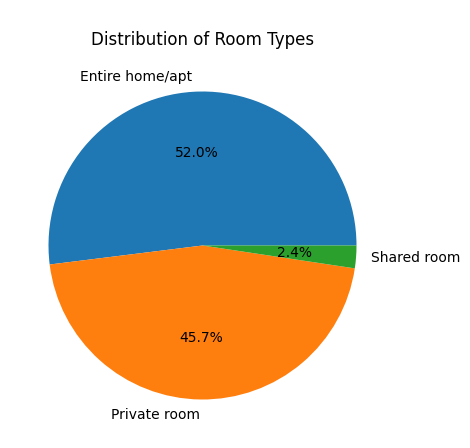

In [44]:
# create a table with the average price and count for each room type
avgRoomPrice = airbnb.groupby('room_type')['price'].agg(avg_price='mean', count='count')
print("Average price per night and count for room types:\n", avgRoomPrice)

# get the count of listings for each room type and display the result
roomTypeDist = airbnb['room_type'].value_counts()
# create a pie graph of the distribution of room types as a proportion of all listings
roomTypeDist.plot(kind='pie', autopct='%1.1f%%', figsize=(5, 5))
# title the overall graph and remove y axis titles
plt.title('\nDistribution of Room Types')
plt.ylabel('')
# call show to make the graph appear when the program is run
plt.show()

For distribution of room types across all the data, entire homes make up over half of all the listings, but these listings have a much higher average price per night.  Not far behind, private rooms still account for over 22,000 listings.  Shared rooms make up just a small proportion of listings which makes sense because most people would rather not share a room with a stranger.  One would think tourists might go for shared rooms cause they'll be much cheaper, but the average price is not that much cheaper than private rooms.

**Visualizing airbnb availability by neighborhood**

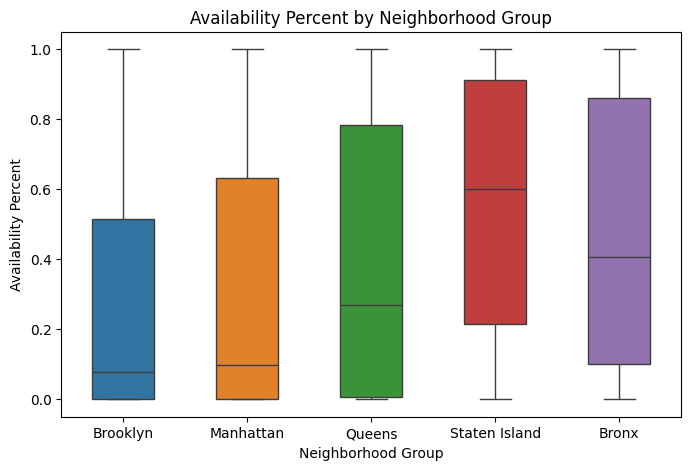

In [45]:
# create a new column that takes the number of days an airbnb is available and converts it to a percent (for that year)
airbnb['availability_percent'] = airbnb['availability_365'] / 365
# group the availability percent by the neighborhood group
availabilityByNeigh = airbnb.groupby('neighbourhood_group')['availability_percent']

# create a boxplot of the distribution of availability percent for each neighborhood group
# make each bar a different color and decrease the width to make it look nicer
plt.figure(figsize=(8, 5))
sns.boxplot(data=airbnb, x='neighbourhood_group', y='availability_percent', width=0.5, hue='neighbourhood_group')
# title the overall graph and axes accordingly
plt.title('Availability Percent by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Availability Percent')
# call show to make the graph appear when the program is run
plt.show()

Percentage of availability shows the proportion of the year that a listing is available.  We can see that for each neighborhood, this value ranges from 0-1 which is the absolute maximum and minimum.  However, one challenge were seeing here is that it doesn't make sense to have a listing that's available 0% of the year, but I don't want to elimiate this data because this could mean that it's already been booked for all the days it was available.  Across the boroughs, staten island has the highest median percent availability, which could mean there's the lowest demand for Airbnbs in that neighborhood.  Brooklyn and Manhattan has the lowest median availability which makes sense from a tourism perspective.  All the boxplots had an interquartile range of at least 0.5, which makes it seem like the data is pretty spread out for all boroughs.

**Running a multiple linear regression for all numeric variables on average long term rental prices**

In [46]:
# import statsmodels.api to run statistical tests
import statsmodels.api as sm

# create a table with all the data from the independent (x) variables
X = rentals[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
             'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
             'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
# save the dependent (y) variable
y = rentals['rent']

# compute the intercept for the regression
X = sm.add_constant(X)
# run a robust linear regression of the x variables on the rent column
# setting cov_type to HC1 makes the regression robust which eliminates bias in standard error
model = sm.OLS(y, X).fit(cov_type='HC1')
# print the results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     348.8
Date:                Sun, 08 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:02:55   Log-Likelihood:                -30869.
No. Observations:                3539   AIC:                         6.177e+04
Df Residuals:                    3524   BIC:                         6.186e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -422.1606    113.993  

At the top, we can see that the R squared is 77.9% which means the x variables explain a lot of the variation in rental prices.  Looking at the prob (F statistic) which is 0 shows that at least one x variable has an effect on another x variable.  This issue is also mentioned at the bottom where the note says it might indicate strong multicollinearity, which is when two or more x variables have a strong correlation with each other.  Looking at the slope coefficient, we see that number of bedrooms and bathrooms, square footage, minutes to subway, floor number, and building age are all statistically significant.  However, some of the coefficients don't make sense logically.  For example, for ever additional bedroom, average rental price decreases by about 315, or for every additional bathroom, price rises by 1181.

**Setting up subsets of each dataset to create a combined dataframe with average nightly prices, counts, and availability**

In [47]:
# create a list of all the common neighborhoods between the two datasets
commonNeighborhoods = rentals['neighborhood'].value_counts().index.intersection(airbnb['neighbourhood'].value_counts().index)
# create a table containning the average rental price and count for each neighborhood in rentals
avgRentalPrice = rentals.groupby('neighborhood')['rent'].agg(rental_avg_price='mean', rental_count='count')
# sort the list by descending average rental price
avgRentalPrice.sort_values(by='rental_avg_price', ascending=False, inplace=True)
# only keep the neighborhoods that overlap with the airbnb dataset
avgRentalPrice = avgRentalPrice.loc[avgRentalPrice.index.isin(commonNeighborhoods)]
# convert average rental price to per day to make it the same unit as airbnb prices
avgRentalPrice['rental_avg_price'] = avgRentalPrice['rental_avg_price'] / 30.437

# create a table containing the average airbnb price and count for each neighborhood in airbnb
avgAirbnbPrice = airbnb.groupby('neighbourhood')['price'].agg(airbnb_avg_price='mean', airbnb_count='count')
# only keep neighborhoods that overlap with the rentals dataset
avgAirbnbPrice = avgAirbnbPrice.loc[avgAirbnbPrice.index.isin(commonNeighborhoods)]

# create a table with the average availability in days for each neighborhood
avgAirbnbAvailability = airbnb.groupby('neighbourhood')['availability_365'].agg(airbnb_avg_availability='mean')
# only keep neighborhoods that overlap with the rentals dataset
avgAirbnbAvailability = avgAirbnbAvailability.loc[avgAirbnbAvailability.index.isin(commonNeighborhoods)]
# add a column that represent availability as a percent of the year
avgAirbnbAvailability['airbnb_percent_availability'] = avgAirbnbAvailability['airbnb_avg_availability'] / 365

# combine all three tables above based on the index (neighborhood)
# now each common neighborhood has values showing average rental price, average airbnb price, number of listings
# from each dataset, availability in days, and percent availability
allInfo = pd.concat([avgRentalPrice, avgAirbnbPrice, avgAirbnbAvailability], axis=1)

# round all values in the table to two places to make it more readable
for col in allInfo.columns:
    allInfo[col] = allInfo[col].round(2)

**Visualizing differences in average nightly prices between airbnbs and long term rentals in common neighborhoods**

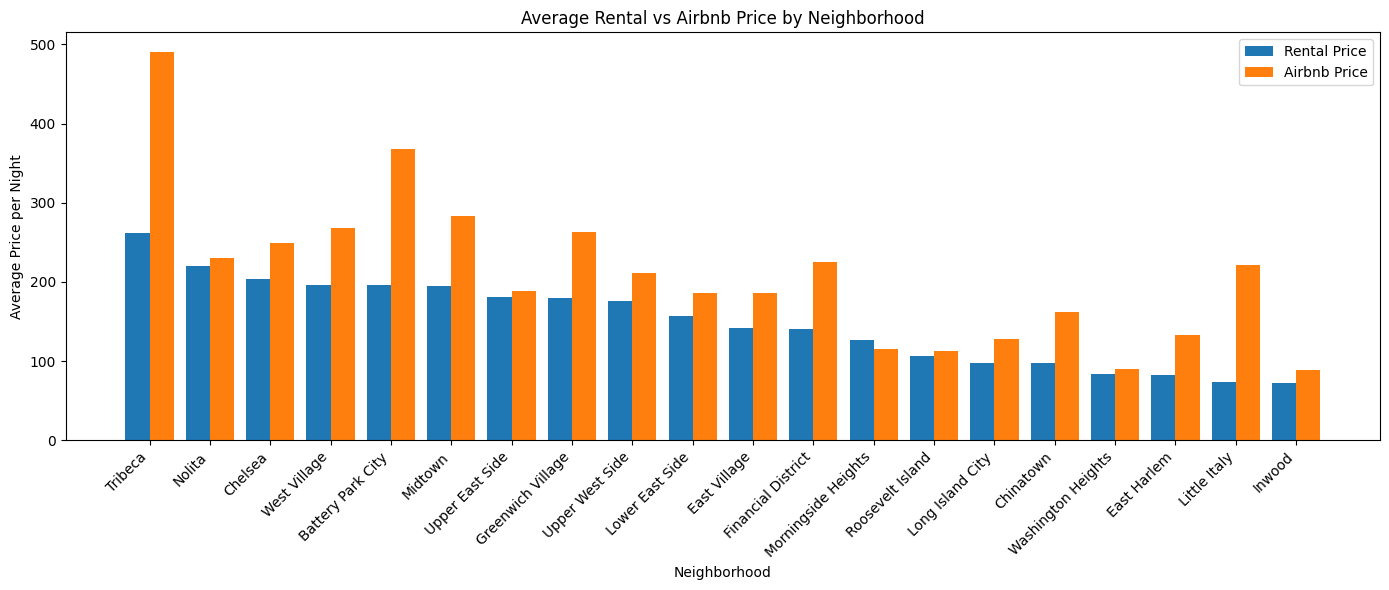

In [48]:
# reset the index in order to the plot the dataframe
allInfo = allInfo.reset_index()

# set the figure size for the graph
plt.figure(figsize=(14, 6))
# create a bar plot for the average rental price for each neighborhood
# set the bar to the left of each x axis tick
# set the bar width to 0.4 and set the label in the legend to Rental Price
plt.bar(np.arange(20) - 0.2, allInfo['rental_avg_price'], 0.4, label='Rental Price')
# use the sam method as above to create a bar for each average airbnb price
# set the bar to the left of the x axis tick
# set the label for the legend to Airbnb price
plt.bar(np.arange(20) + 0.2, allInfo['airbnb_avg_price'], 0.4, label='Airbnb Price')

# label the overall graph and axes accordingly
plt.xlabel('Neighborhood')
plt.ylabel('Average Price per Night')
plt.title('Average Rental vs Airbnb Price by Neighborhood')
# set the x axis tick labels to the neighborhood name
# rotate the labels so they don't overlap
plt.xticks(np.arange(20), allInfo['index'], rotation=45, ha='right')
# add a legend to show which color bar represents which dataset
plt.legend()
# call tight_layout and show to format the graph and make it appear when the program is run
plt.tight_layout()
plt.show()


Comparing average nightly prices between long and short term rentals, we can see that Airbnb prices are higher for all of these neighborhoods, except Morningside Heights, but even then its quite similar.  The neighborhoods are ordered by descending rental price, so we notice that average price decreases slightly with each neighborhood.  However, this same pattern isn't present in average airbnb prices, becasue we see bigger differences in prices between airbnbs in different neighborhoods.  Also, the difference in prices between airbnbs and long term rentals in the same neighborhood have a large range.  For example, tribeca has a large difference in prices with airbnb nightly prices being almost double those of long term rentals.  But in neighborhoods where average nightly prices are cheaper, like Roosevelt Island and Inwood, average airbnb and long term rental prices are quite similar.  These differences in prices may have to do with the number of available properties which we'll look at in the next graph.

**Visualizing differences in listing counts for airbnbs and long term rentals**

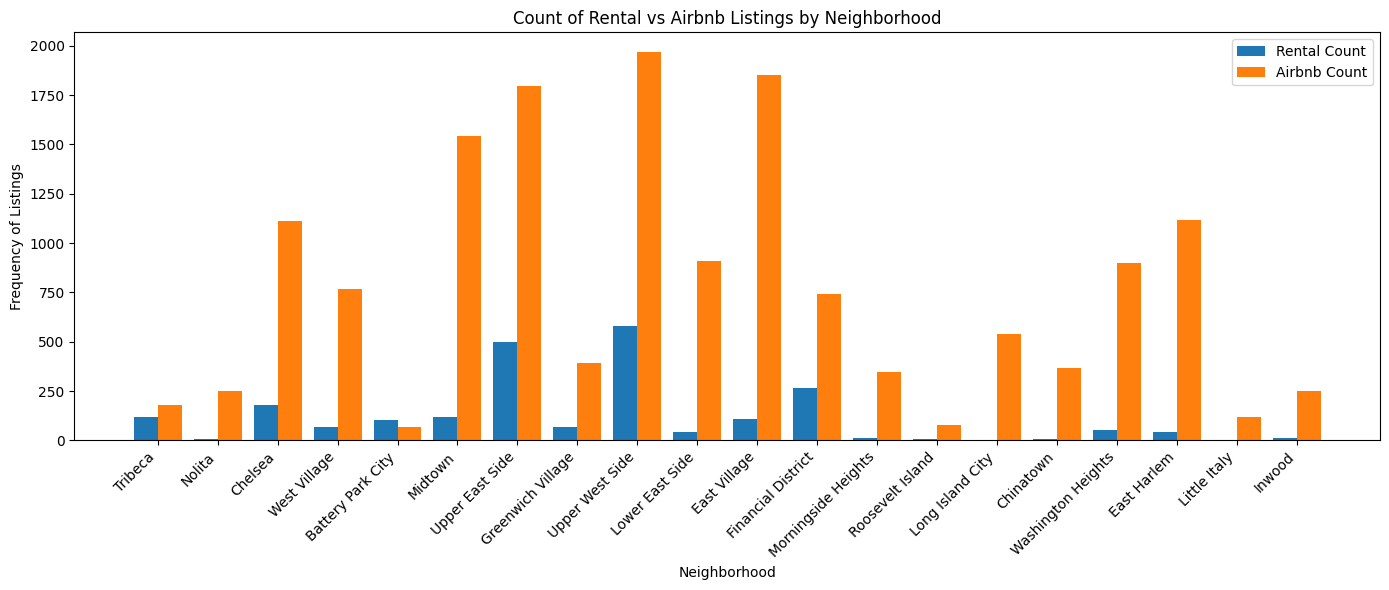

In [49]:
# using the same method as above, make a dual bar graph for count of listings in each neighborhood
plt.figure(figsize=(14, 6))
# plot a bar for the counts for each dataset
plt.bar(np.arange(20) - 0.2, allInfo['rental_count'], 0.4, label='Rental Count')
plt.bar(np.arange(20) + 0.2, allInfo['airbnb_count'], 0.4, label='Airbnb Count')

# label the overall graph and axes accordingly
plt.xlabel('Neighborhood')
plt.ylabel('Frequency of Listings')
plt.title('Count of Rental vs Airbnb Listings by Neighborhood')
# set the x axis tick labels to the neighborhood name
# rotate the labels so they don't overlap
plt.xticks(np.arange(20), allInfo['index'], rotation=45, ha='right')
# add a legend to show which color bar represents which dataset
plt.legend()
# call tight_layout and show to format the graph and make it appear when the program is run
plt.tight_layout()
plt.show()

Since the subset of the airbnb dataset with just Manhattan listings has about 21,000 rows, while the streetEasy dataset only has about 3500 rows, we see a large difference in the number of listings from each dataset for each neighborhood.  However, the relative number of listings for each neighborhood can still be used to explain average nightly prices.  For example, Tribeca has one of the lowest counts for Airbnb listings which is probably one reason why the average nightly prices for Airbnbs in that neighborhood are so high.  Same can be said for airbnbs in Battery Park City and Little Italy.  We can apply basic economic theory, which tells us that neighborhoods with low supply of long or short term rental listings are going to have excess demand which drives up prices.  Vice versa goes for neighborhoods with large housing supply, where the excess supply causes realtors to lower prices to stay competitive.

**Pearson correlation test on average prices from both datasets**

In [50]:
# import pearsonr from scipy.stats to run a pearson correlation test
from scipy.stats import pearsonr
# run a pearson correlation test between average price for rentals and airbnbs
# extract the correlation coefficient and corresponding p-value from the test
corrCoefficient, pValue = pearsonr(allInfo['rental_avg_price'], allInfo['airbnb_avg_price'])
# print the result
# I rounded the results to make them more obvious
print("Pearson correlation coefficient:", round(corrCoefficient, 2))
print("P-value:", round(pValue, 3))


Pearson correlation coefficient: 0.82
P-value: 0.0


The Pearson correlation of 0.82 shows that average airbnb prices and average rental prices have a strong positive correlation with each other.  This means that higher airbnb prices are associated with higher long term rental prices, and vice versa.  The p-value (rounded to 3 decimals) for this test is 0 which means this result is statistically significant.

# 4. Challenges and Limitations
---
- Discuss any challenges encountered during the project, such as:
 - Issues with data quality.
 - Constraints in analysis tools or time.
- Highlight any limitations in your analysis and how they might affect your conclusions.

As I mentioned earlier one main difference between the two datasets is that the Airbnb data had almost 50,000 listings and covered data from five different boroughs within New York City.  Meanwhile, my StreetEasy rentals data only covered about 3500 listings and the area was limited to just Manhattan.  Certain neighborhoods within the rentals dataset with a lower relative amount of listings may have skewed average prices.  Also, it meant my analysis is limited to Manhattan housing in 2019, which won't relfect recent shifts in the housing market, including effects from the pandemic.

In my analysis, I converted rental average prices to per day, so they would be in the same units as airbnb average prices.  However, it's still difficult to compare the two prices because there are costs specific to short or long term housing included in the price.  For example, long term rentals usually require security deposits and utility payments, while airbnb prices include cleaning fees.  Another factor that may influence price dynamics are the different target audiences for short vs. long term housing.  These two that I mentioned as well as other factors can not be fully explained by simple price per night comparisons.

For the boxplots of percentage availability, I mentioned how there were some airbnb listings with 0% availability.  This may be due to being fully booked, but it could also be because of inactive listings, so its hard to interpret the true meaning of availability precisely.  Also, the availability columns do not reflect seasonal patterns which is very important in toursim heavy markets like New York City.  

In the multiple linear regression on long term rental prices, there was a warning for indiciations of multicollinearity, which means at least two x variables are highly correlated which can distort reliability of estimates.  Also, I mentioned that some slope coefficients had illogical signs, like bedrooms have a negative slope which means additional bedrooms will decrease price.  This could result from the issue of multicollinearity and errors in data collection.

Finally, correlation does not imply causation, so even though the Pearson correlation coefficient showed a strong positive correlation, we cannot directly say increasing airbnb prices will cause an increase in long term rental prices, or vice versa.  

# 5. Conclusion and Future Direction
---
- Conclusions: Summarize your main findings in relation to your project objectives.
- Recommendation and Future Direction:
 - Propose actions based on your findings.
 - Suggest next steps for further analysis or research.

This project explored the relationship between short-term and long-term housing rentals in Manhattan focusing on how Airbnb activity may be associated with long-term rental prices. The findings revealed a strong positive correlation between average Airbnb prices and average long term rental prices, suggesting that neighborhoods with more expensive short term rentals also tend to have higher long term housing costs. These results supports concern that short term rentals, like Airbnbs, may put pressure on local housing markets.

New York City is a major tourism hub with high demand for both short and long term housing. Airbnb prices were higher than long term rents in nearly every neighborhood, which provides an incentive for landlords to list units for short stays rather than long term leases. In areas like Tribeca and Battery Park City, limited supply and high tourist appeal increases both Airbnb and rental prices. One explanation is that high tourism neighborhoods drive up short term rental prices, which can limit long term housing supply and increase rents.

One way to extend this analysis is using data from multiple years to perform a time series analysis of how Airbnb growth correlates with changes in rental prices. This could be especially useful to see any effects of the pandemic on the New York City housing market. Another way to expand my analysis is including all five boroughs to get a more comprehensive view of the New York City housing market.  Recent studies show that Brooklyn and Queens have seen rapid growth in both Airbnb activity and rental prices.  In addition, integrating external data, such as income levels, zoning policies, and tourism traffic, could give more insight into trends in housing prices.

Following more analyzation, we could assess the impact of recent policy measures like Local Law 18, which restricts short term rentals in New York City. By understanding how such regulations affect both Airbnb supply and long term rental affordability, we could offer valuable insights to policymakers in order to balance tourism with housing accessibility.

# 6. References
---
- List all references for datasets, tools, and external sources used in the project.

**Kaggle - NYC Airbnb Open Data**

Gomonov, D. (2019). New York City Airbnb Open Data. Retrieved from https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

**Inside Airbnb**

Inside Airbnb. (2019). New York City Airbnb Open Data. Retrieved from https://insideairbnb.com

**Kaggle - StreetEasy Data**

Zohaib30. (n.d.). StreetEasy Dataset. Retrieved from https://www.kaggle.com/datasets/zohaib30/streeteasy-dataset

**StreetEasy**

StreetEasy. (n.d.). NYC Real Estate Listings and Market Data. Retrieved from https://streeteasy.com

**New York City Housing Issue Articles**

Gattupalli, A. (2024). Tourism Gentrification in the United States: How Short-Term Rentals Impact American Cities. Medium. Retrieved from https://medium.com/@ankithagattupalli/tourism-gentrification-in-the-united-states-how-short-term-rentals-impact-american-cities-39316e1b39bb

NYC Housing. (n.d.). Problem. NYC.gov. Retrieved from https://www.nyc.gov/site/housing/about/problem.page